# 2) IACOV - Model Development for Prognosis - ICU
## Strategy 8) Training on 70% of a specific hospital plus same absolute number of other regions hospitals

In [1]:
# !pip install npm nodejs

In [2]:
# !jupyter lab clean
# !jupyter lab build

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_18224\2017038996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [4]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [5]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [6]:
#22 predictors + outcome + Region/State
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'icu'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(6046, 26)

In [7]:
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [8]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [9]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 26)

In [10]:
df_all_hospitals.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'icu', 'region', 'state'],
      dtype='object')

In [11]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

In [12]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [13]:
import ipywidgets as widgets
from IPython.display import clear_output

In [14]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [15]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'                     #RS 
                                               ])

In [16]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [17]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [18]:
# !pip install ipywidgets

In [19]:
# !jupyter nbextension enable --py widgetsnbextension

In [20]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [22]:
display(dropdown_hospital)

Dropdown(index=1, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_2…

**Filter all hospitals except the selected above**

In [23]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

**Split train/test of specific Hospital**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(1500, 26)

In [26]:
X_specific = df_iacov_model_lean_specific.drop(['icu'],axis=1)
X_specific.shape

(1500, 25)

In [27]:
y_specific = df_iacov_model_lean_specific['icu']
y_specific.shape

(1500,)

In [28]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [29]:
X_train_specific.shape

(1050, 25)

In [30]:
X_test_specific.shape

(450, 25)

**Filter same absolute number from hospitals on O T H E R region**

PS: Also removed GHC hospital due to very low positive cases

In [31]:
from random import sample

#Sample all hospitals except specific hospital
df_all_hospitals_except_specific = df_all_hospitals[(~df_all_hospitals.index.isin(X_specific.index)) &
                                                       (df_all_hospitals.city_hospital != 'GHC_02')]

#Sample all hospitals of regions distinct of specific hospital
df_all_hospitals_other_region = df_all_hospitals_except_specific[df_all_hospitals_except_specific.region != X_specific.region.iloc[0]]

#Then, sample all hospital data with same absolute number on O T H E R region as specific hospital
df_iacov_model_lean = df_all_hospitals_other_region.sample(X_train_specific.shape[0], random_state=42)
df_iacov_model_lean.shape

(1050, 26)

In [32]:
#Check data from OTHER region
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HOSPPORTUGUES_SALVADOR       365
CEARA_UNIMED                 244
HRL_2021_02                  138
HMV_POA_02                   109
HOSPSANTAJULIA_MANAUS         65
HOSPSANTACATARINABLUMENAU     46
PERNAMBUCO_FULL               25
PELOTAS                       23
CEARA_HUWC                    18
AMAZONAS_HUGV                 17
Name: count, dtype: int64

**Append 70% data of specific hospital**

In [33]:
df_iacov_model_lean = pd.concat([df_iacov_model_lean, X_train_specific], axis=0)
df_iacov_model_lean.shape

(2100, 26)

In [34]:
#Check after apending data of specific hospital
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HC_USP                       1050
HOSPPORTUGUES_SALVADOR        365
CEARA_UNIMED                  244
HRL_2021_02                   138
HMV_POA_02                    109
HOSPSANTAJULIA_MANAUS          65
HOSPSANTACATARINABLUMENAU      46
PERNAMBUCO_FULL                25
PELOTAS                        23
CEARA_HUWC                     18
AMAZONAS_HUGV                  17
Name: count, dtype: int64

In [35]:
print("Specific: " + specific_hospital )
print("(training -  - other regions - same absolute number) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

Specific: HC_USP
(training -  - other regions - same absolute number) dataset: (2100, 26)

(training - specific) dataset: (1050, 25)

(test - specific) dataset: (450, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [36]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(2100, 25)

In [37]:
#Preencho NAs com 0 
df_iacov_model_lean['icu'] = df_iacov_model_lean['icu'].fillna(0)
df_iacov_model_lean.icu.value_counts()

icu
0.000    1728
1.000     372
Name: count, dtype: int64

In [38]:
(df_iacov_model_lean.icu.value_counts()/len(df_iacov_model_lean.icu))*100

icu
0.000   82.286
1.000   17.714
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [39]:
df_iacov_model_lean['class'] = df_iacov_model_lean['icu'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['icu'],axis=1)

### 2.1.4) Recalculating null mean_press

In [40]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [41]:
#Check mean_press missing before recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,83,0,float64,-0.117,2100.000,58.011,17.319,18.000,45.000,59.000,71.000,105.000
male,0,0.000,2,979,float64,-0.136,2100.000,0.534,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,192,9.143,128,0,float64,0.802,1908.000,86.542,18.227,13.000,74.000,85.000,97.000,233.000
resp_rate,353,16.810,53,0,float64,2.059,1747.000,22.919,6.696,10.000,18.000,21.000,26.000,97.000
sys_press,318,15.143,152,0,float64,-0.460,1782.000,121.779,22.660,10.000,110.000,120.000,135.000,200.000
dias_press,315,15.000,117,0,float64,-0.432,1785.000,72.823,14.436,6.000,64.000,73.000,80.000,129.000
mean_press,293,13.952,917,79,float64,-1.895,1807.000,84.746,24.271,0.000,77.652,88.984,97.000,166.000
temp,277,13.190,88,0,float64,0.169,1823.000,36.358,0.875,32.000,35.900,36.300,36.800,41.200
hemoglobin,1049,49.952,160,0,float64,-0.673,1051.000,12.631,2.247,3.200,11.400,13.000,14.100,19.000
platelets,222,10.571,636,0,float64,0.401,1878.000,243562.625,134759.340,12.000,159000.000,224000.000,325000.000,692000.000


In [42]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [43]:
#Check mean_press missing after recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,83,0,float64,-0.117,2100.000,58.011,17.319,18.000,45.000,59.000,71.000,105.000
male,0,0.000,2,979,float64,-0.136,2100.000,0.534,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,192,9.143,128,0,float64,0.802,1908.000,86.542,18.227,13.000,74.000,85.000,97.000,233.000
resp_rate,353,16.810,53,0,float64,2.059,1747.000,22.919,6.696,10.000,18.000,21.000,26.000,97.000
sys_press,318,15.143,152,0,float64,-0.460,1782.000,121.779,22.660,10.000,110.000,120.000,135.000,200.000
dias_press,315,15.000,117,0,float64,-0.432,1785.000,72.823,14.436,6.000,64.000,73.000,80.000,129.000
mean_press,237,11.286,927,79,float64,-1.883,1863.000,85.239,24.191,0.000,77.995,89.652,98.000,166.000
temp,277,13.190,88,0,float64,0.169,1823.000,36.358,0.875,32.000,35.900,36.300,36.800,41.200
hemoglobin,1049,49.952,160,0,float64,-0.673,1051.000,12.631,2.247,3.200,11.400,13.000,14.100,19.000
platelets,222,10.571,636,0,float64,0.401,1878.000,243562.625,134759.340,12.000,159000.000,224000.000,325000.000,692000.000


In [44]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [45]:
#column_summaries(X_test_specific)

### Put X_test and y_test in separate files

In [46]:
x_test_specific_name = 'X_test_other_region_absolute_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
x_test_specific_name

'X_test_other_region_absolute_SUDESTE_SP_HC_USP.csv'

In [47]:
y_test_specific_name = 'y_icu_other_region_absolute_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
y_test_specific_name

'y_icu_other_region_absolute_SUDESTE_SP_HC_USP.csv'

In [48]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(450, 25)

In [49]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(450,)

## 2.4) Prepare Experiment 

### All hospitals except specific

In [50]:
df_iacov_model_lean.shape

(2100, 25)

In [51]:
df_iacov_model_train = df_iacov_model_lean

In [52]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)
df_iacov_model_train.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

In [53]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 270 to 1864
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2100 non-null   float64
 1   male             2100 non-null   float64
 2   heart_rate       1908 non-null   float64
 3   resp_rate        1747 non-null   float64
 4   sys_press        1782 non-null   float64
 5   dias_press       1785 non-null   float64
 6   mean_press       1863 non-null   float64
 7   temp             1823 non-null   float64
 8   hemoglobin       1051 non-null   float64
 9   platelets        1878 non-null   float64
 10  hematocrit       1051 non-null   float64
 11  red_cells_count  762 non-null    float64
 12  hcm              1777 non-null   float64
 13  rdw              1775 non-null   float64
 14  mcv              1779 non-null   float64
 15  leukocytes       1879 non-null   float64
 16  neutrophil       1552 non-null   float64
 17  lymphocytes      

In [54]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2100, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [56]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [57]:
X_train.shape

(2418, 22)

In [58]:
X_test.shape

(631, 22)

In [59]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [60]:
seed

42

In [61]:
# Xtrain.head()

### Filtering only 5 pre-selected models

In [62]:
# print(inspect.getsource(compare_models))

In [63]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.965300,0.994100,0.995000,0.935500,0.939600,0.966400,0.930500,0.185800,0.283500,0.896600
1,Extreme Gradient Boosting,0.959900,0.993000,0.995000,0.924700,0.930100,0.961400,0.919700,0.101400,0.284500,0.883800
2,CatBoost Classifier,0.955300,0.991500,0.992600,0.918100,0.924300,0.957100,0.910700,0.088500,0.101500,0.859000


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [64]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.975,1.000,1.000,0.950,0.953,0.976,0.950,0.269,0.103,0.927
1,0.984,1.000,1.000,0.967,0.968,0.984,0.967,0.509,0.680,0.957
2,0.984,1.000,1.000,0.967,0.968,0.984,0.967,0.286,0.865,0.945
3,0.959,0.995,0.992,0.926,0.930,0.960,0.917,0.000,0.002,0.866
4,0.938,0.989,0.984,0.893,0.901,0.941,0.876,0.000,0.000,0.810
5,0.975,0.999,0.992,0.959,0.960,0.976,0.950,0.149,0.240,0.913
6,0.984,1.000,1.000,0.967,0.968,0.984,0.967,0.372,0.656,0.942
7,0.975,1.000,1.000,0.950,0.953,0.976,0.950,0.072,0.746,0.920
8,0.954,0.999,1.000,0.909,0.916,0.956,0.909,0.002,0.006,0.864
9,0.954,1.000,1.000,0.908,0.917,0.957,0.909,0.014,0.067,0.886


In [65]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.950,0.993,1.000,0.901,0.910,0.953,0.901,0.000,0.000,0.838
1,0.959,1.000,1.000,0.917,0.924,0.960,0.917,0.077,0.936,0.924
2,0.955,1.000,1.000,0.909,0.917,0.957,0.909,0.000,0.000,0.866
3,0.938,0.995,0.992,0.884,0.895,0.941,0.876,0.000,0.000,0.799
4,0.905,0.978,0.984,0.826,0.850,0.912,0.810,0.000,0.000,0.722
5,0.955,0.992,0.992,0.917,0.923,0.956,0.909,0.000,0.000,0.863
6,0.963,1.000,1.000,0.926,0.931,0.964,0.926,0.073,0.000,0.893
7,0.959,1.000,1.000,0.917,0.924,0.960,0.917,0.015,0.071,0.890
8,0.938,0.996,0.983,0.893,0.901,0.940,0.876,0.000,0.000,0.808
9,0.929,0.999,1.000,0.858,0.877,0.934,0.859,0.000,0.000,0.788


In [66]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.955,0.986,0.984,0.926,0.930,0.956,0.909,0.228,0.209,0.867
1,0.988,1.000,1.000,0.975,0.976,0.988,0.975,0.355,0.003,0.940
2,0.959,0.999,1.000,0.917,0.924,0.960,0.917,0.023,0.024,0.886
3,0.938,0.986,0.975,0.901,0.908,0.940,0.876,0.111,0.546,0.806
4,0.905,0.965,0.967,0.843,0.860,0.910,0.810,0.004,0.047,0.715
5,0.959,0.987,0.984,0.934,0.937,0.960,0.917,0.106,0.336,0.862
6,0.975,0.996,0.992,0.959,0.960,0.976,0.950,0.606,0.103,0.902
7,0.938,0.997,1.000,0.876,0.890,0.942,0.876,0.025,0.063,0.862
8,0.942,0.987,0.983,0.901,0.908,0.944,0.884,0.334,0.388,0.834
9,0.938,0.991,0.992,0.883,0.895,0.941,0.875,0.140,0.327,0.842


### Select best algorithm based on test data AUC

In [67]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.905,0.961,0.634,0.963,0.789,0.703,0.647,0.000,0.000,0.519


In [68]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.911,0.963,0.795,0.936,0.730,0.761,0.706,0.000,0.000,0.529


In [69]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.918,0.961,0.759,0.952,0.773,0.766,0.716,0.064,0.026,0.574


In [70]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb
#preds = preds_cat
preds = preds_lgb
#preds = preds_xgb

### Best model

In [71]:
npv(y_test, preds['Label'])

0.9548133595284872

In [72]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.95', '0.98']

,,
,,
Ground Truth Prevalence,. . .,0.177
Test set Prevalence,. . .,0.193
True positive rate (recall),. . .,0.795
False positive rate,. . .,0.064
Positive predictive value (precision),. . .,0.730
True negative rate (specificity),. . .,0.936
False negative rate,. . .,0.205
Negative predictive value,. . .,0.955
Positive likelihood ratio (bigger is better),. . .,12.498


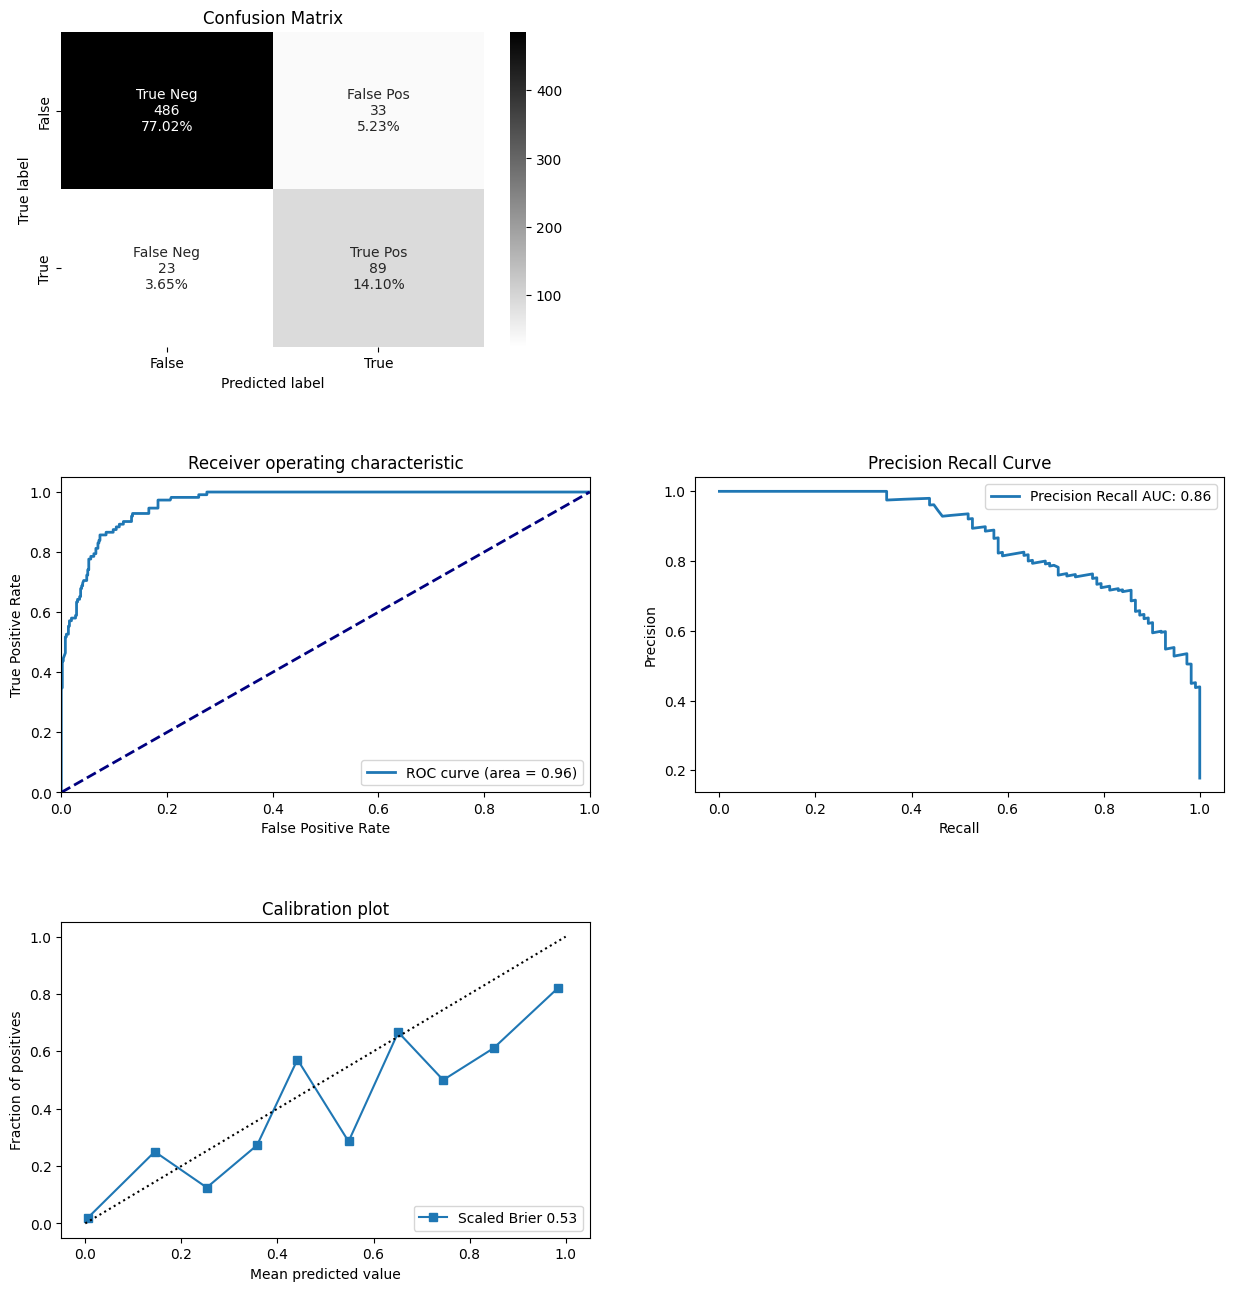

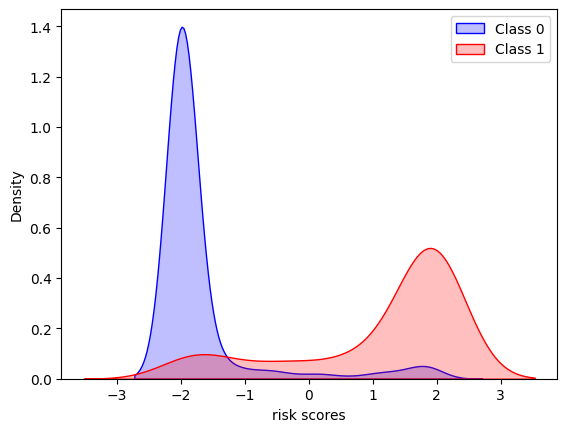

,,
,,
Ground Truth Prevalence,. . .,0.177
Test set Prevalence,. . .,0.193
True positive rate (recall),. . .,0.795
False positive rate,. . .,0.064
Positive predictive value (precision),. . .,0.730
True negative rate (specificity),. . .,0.936
False negative rate,. . .,0.205
Negative predictive value,. . .,0.955
Positive likelihood ratio (bigger is better),. . .,12.498


In [73]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results 
#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous lines

In [74]:
#evaluate_model(lgbmtuned)

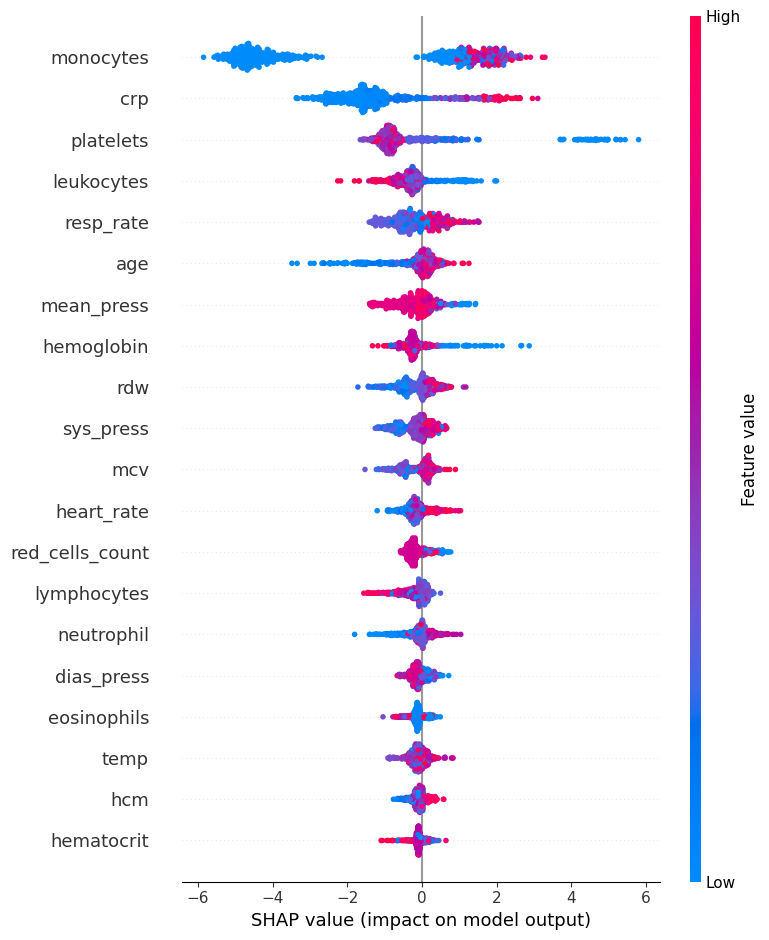

In [75]:
#interpret_model(cattuned)
interpret_model(lgbmtuned)
#interpret_model(xgbtuned)

In [76]:
# plot_model(lgbmtuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [77]:
#final_model = finalize_model(cattuned)
final_model = finalize_model(lgbmtuned)
#final_model = finalize_model(xgbtuned)

[LightGBM] [Info] Number of positive: 372, number of negative: 1728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 2100, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [78]:
str(final_model.__class__.__name__)

'LGBMClassifier'

In [79]:
final_model_name = str(final_model.__class__.__name__) + '_other_region_abs_number_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
final_model_name

'LGBMClassifier_other_region_abs_number_SUDESTE_SP_HC_USP'

In [80]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [81]:
#final_model.get_all_params()
final_model

LGBMClassifier(class_weight='balanced', colsample_bytree=0.9950948847840141,
               n_estimators=142, n_jobs=-1, num_leaves=42, random_state=42,
               reg_alpha=0.33486009438808095, reg_lambda=0.2042842520101622,
               scale_pos_weight=11)

# Use the saved model to predict on specific hospital

In [82]:
import pickle
import joblib

#Carrego o modelo unico
print('loaded: ' + final_model_name)
other_region_abs_number_model_pkl = final_model_name + ".pkl"
prep_pipe_other_region_abs_number, other_region_abs_number_model = joblib.load(other_region_abs_number_model_pkl)

loaded: LGBMClassifier_other_region_abs_number_SUDESTE_SP_HC_USP


In [83]:
other_region_abs_number_model.__class__.__name__

'LGBMClassifier'

In [84]:
x_test_specific_name

'X_test_other_region_absolute_SUDESTE_SP_HC_USP.csv'

In [85]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(450, 25)

In [86]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [87]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["icu"]
y_test_single.shape

(450,)

In [88]:
pd.set_option('display.max_columns', None)
X_test_single.head()

,city_hospital,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state
2326,HC_USP,71.000,0.000,70.000,25.000,97.000,52.000,66.985,36.500,11.000,311000.000,35.000,NaN,27.700,13.900,87.300,15670.000,14180.000,1110.000,0.010,NaN,0.370,1.492,SUDESTE,SP
1933,HC_USP,21.000,0.000,106.000,22.000,117.000,71.000,86.318,36.000,NaN,159000.000,NaN,NaN,29.300,13.400,83.600,8980.000,8350.000,270.000,0.090,NaN,0.270,2.664,SUDESTE,SP
1267,HC_USP,49.000,1.000,79.000,36.000,103.000,61.000,74.986,37.700,NaN,337000.000,NaN,NaN,28.500,14.600,87.500,8410.000,6810.000,1220.000,0.010,NaN,0.370,3.107,SUDESTE,SP
1877,HC_USP,52.000,0.000,141.000,25.000,166.000,102.000,123.312,37.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUDESTE,SP
1031,HC_USP,75.000,1.000,74.000,28.000,120.000,70.000,86.650,33.600,NaN,117000.000,NaN,NaN,29.700,15.700,83.400,8110.000,7100.000,470.000,0.000,NaN,0.540,NaN,SUDESTE,SP


In [89]:
X_test_single["class"] = y_test_single

In [90]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state', 'class'],
      dtype='object')

In [91]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [92]:
X_test_single_transformed = prep_pipe_other_region_abs_number.fit_transform(X_test_single)
X_test_single_transformed.head()

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Numeric
resp_rate,Numeric
sys_press,Numeric
dias_press,Numeric
mean_press,Numeric
temp,Numeric
hemoglobin,Numeric
platelets,Numeric


,class,age,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,monocytes,crp,male_1.0
2326,1,0.759,-0.942,0.092,-0.994,-1.440,-1.348,0.117,-2.736,0.798,-1.915,-0.524,-0.112,0.213,0.328,1.378,0.362,-0.108,-0.249,0.044,0.000
1933,1,-2.268,1.067,-0.278,-0.127,-0.109,-0.120,-0.425,-0.020,-0.656,-0.068,0.182,-0.351,-0.374,-0.054,0.143,-1.314,0.481,-0.413,1.208,0.000
1267,1,-0.573,-0.440,1.449,-0.734,-0.810,-0.840,1.417,-0.020,1.047,-0.068,-0.171,0.222,0.245,-0.087,-0.184,0.582,-0.108,-0.249,1.648,1.000
1877,1,-0.391,3.020,0.092,1.997,2.062,2.230,1.092,-0.020,-0.206,-0.068,0.006,-0.208,-0.041,-0.091,-0.183,-0.216,-0.108,-0.191,-0.213,0.000
1031,1,1.001,-0.719,0.462,0.003,-0.179,-0.099,-3.027,-0.020,-1.058,-0.068,0.359,0.747,-0.406,-0.104,-0.122,-0.915,-0.182,0.030,-0.213,1.000


In [93]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [94]:
X_test_single_transformed.shape

(450, 20)

In [95]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [96]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0'],
      dtype='object')

In [97]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['eosinophils', 'red_cells_count']

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [98]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    elif(column=='male_1.0'):
        X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_0.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [99]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [100]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0', 'eosinophils', 'red_cells_count'],
      dtype='object')

In [101]:
X_test_single_transformed.shape

(450, 22)

In [102]:
X_test_single_transformed.shape

(450, 22)

In [103]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [104]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0', 'eosinophils', 'red_cells_count'],
      dtype='object')

**Reorder columns**

In [105]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [106]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(450, 22)

0.6467544023979017


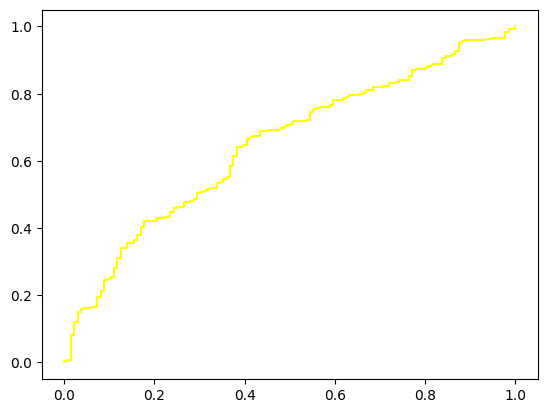

In [107]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = other_region_abs_number_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - best - AUC " +  str(auc_ind), color="yellow")

In [108]:
y_pred_prob1.shape

(450,)

In [109]:
y_pred = other_region_abs_number_model.predict(X_test_single_transformed)

,,
,,
Ground Truth Prevalence,. . .,0.698
Test set Prevalence,. . .,0.418
True positive rate (recall),. . .,0.478
False positive rate,. . .,0.279
Positive predictive value (precision),. . .,0.798
True negative rate (specificity),. . .,0.721
False negative rate,. . .,0.522
Negative predictive value,. . .,0.374
Positive likelihood ratio (bigger is better),. . .,1.710


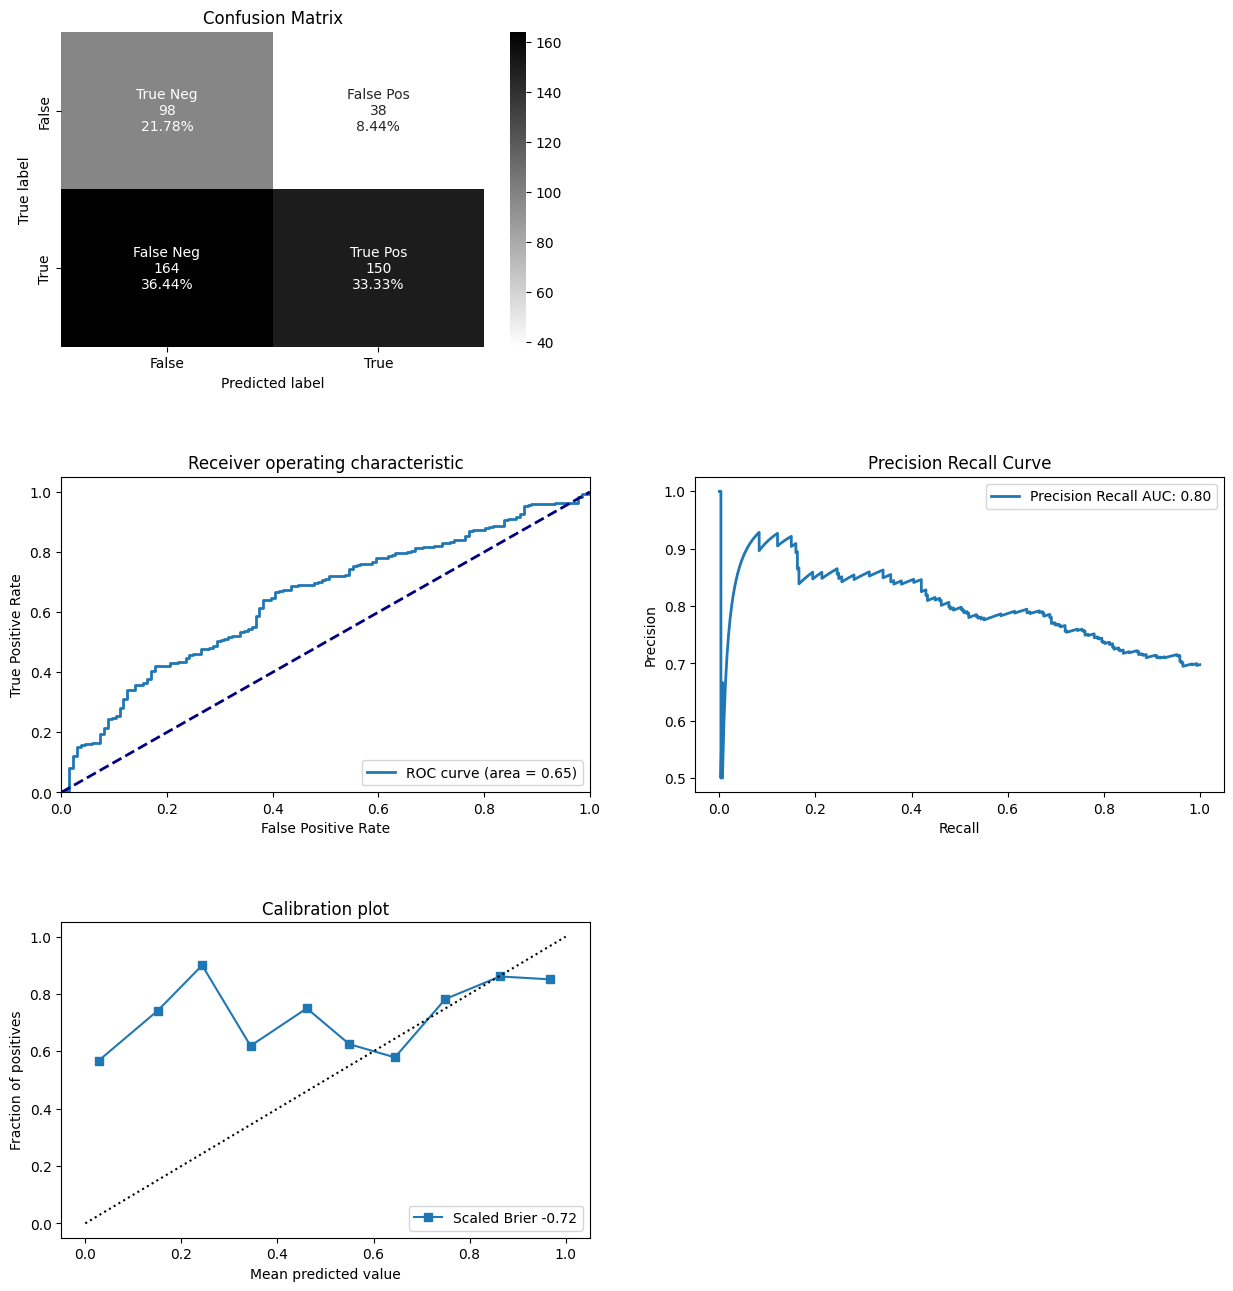

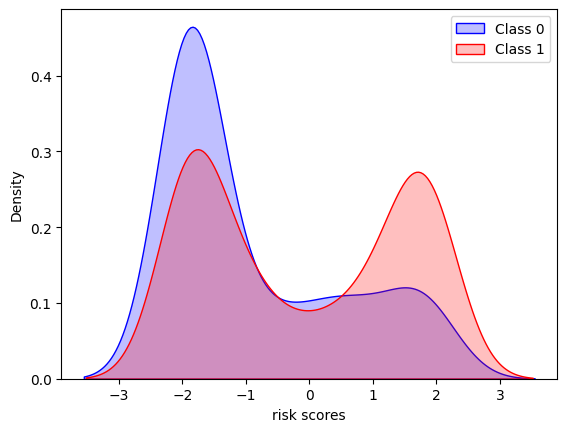

,,
,,
Ground Truth Prevalence,. . .,0.698
Test set Prevalence,. . .,0.418
True positive rate (recall),. . .,0.478
False positive rate,. . .,0.279
Positive predictive value (precision),. . .,0.798
True negative rate (specificity),. . .,0.721
False negative rate,. . .,0.522
Negative predictive value,. . .,0.374
Positive likelihood ratio (bigger is better),. . .,1.710


In [110]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, pd.Series(y_pred_prob1))

In [111]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.6467544023979017

In [112]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.59', '0.70']

In [113]:
#recall
tpr(y_test_single, y_pred)

0.47770700636942676

In [114]:
#specificity
tnr(y_test_single, pd.Series(y_pred))

0.7205882352941176

In [115]:
#accuracy
accuracy(y_test_single, y_pred)

0.5511111111111111

In [116]:
ppv(y_test_single, y_pred)

0.7978723404255319

In [117]:
npv(y_test_single, y_pred)

0.37404580152671757

# End File